# Regresion Lineal
Un modelo de regresión lineal es una técnica estadística que se utiliza para estudiar la relación entre una variable dependiente y una o más variables independientes. Se busca encontrar una línea recta que mejor se ajuste a los datos y que permita predecir el valor de la variable dependiente. Para crear un modelo de regresión lineal de una data, se necesitan los siguientes pasos:


*   Seleccionar la variable dependiente y la(s) variable(s) independiente(s) que se quieren relacionar.
*   Recopilar los datos de las variables y organizarlos en una tabla o un archivo.
*   Elegir el software o la herramienta que se va a utilizar para realizar el análisis. Por ejemplo, se puede usar Excel, Python, R, SPSS, etc.
*   Aplicar la función o el comando que permite estimar los coeficientes de regresión, el intercepto y la pendiente de la línea recta. Por ejemplo, en Excel se puede usar la función ESTIMACION.LINEAL, en R se puede usar la función lm, etc.
*   Interpretar los resultados del modelo, como el valor de R cuadrado, el error estándar, los intervalos de confianza, etc. Estos indican la calidad del ajuste y la significación estadística del modelo.
*   Graficar la línea de regresión y los puntos de datos para visualizar la relación entre las variables.


# Casos Especiales
Un problema de regresión lineal que necesita de artificios para lograrlo es aquel en el que los datos no cumplen con los supuestos básicos de la regresión lineal, como la **linealidad**, la **homocedasticidad**, la **independencia** o la **normalidad**. En estos casos, se requiere aplicar algunas técnicas o transformaciones para corregir las violaciones de los supuestos y obtener un modelo válido y confiable. Algunos ejemplos de artificios que se pueden usar son:


*   Transformar las variables dependientes o independientes para lograr una relación lineal entre ellas. Por ejemplo, se puede usar el logaritmo, la raíz cuadrada, el inverso o la potencia de una variable para cambiar su forma y ajustarla a una línea recta.
*   Utilizar variables ficticias o dummy para incorporar variables cualitativas al modelo. Por ejemplo, se puede crear una variable binaria que tome el valor de 1 si el individuo es hombre y 0 si es mujer, y usarla como una variable independiente para estudiar su efecto sobre la variable dependiente.
*   Aplicar técnicas de regularización para evitar el sobreajuste o la multicolinealidad del modelo. Por ejemplo, se puede usar la regresión de Ridge, la regresión de Lasso o la regresión de Elastic Net para penalizar los coeficientes de regresión que sean demasiado grandes o redundantes, y así mejorar la precisión y la generalización del modelo.


# Generando los datos

Para generar datos artificiales para cada uno de los tres casos que no cumplen con la linealidad, homocedasticidad, y independencia o la normalidad, se pueden usar las siguientes funciones de la librería numpy:

*  Para generar datos que no cumplen con la linealidad, se puede usar la función np.sin o np.cos para crear una relación no lineal entre las variables. Por ejemplo:




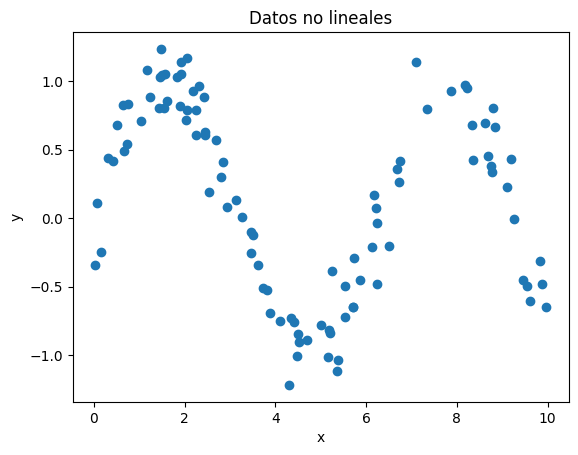

In [136]:
import numpy as np
import matplotlib.pyplot as plt
# Generar 100 datos aleatorios entre 0 y 10
x = np.random.uniform(0, 10, 100)
# Aplicar la función seno a x y añadir un ruido aleatorio
y = np.sin(x) + np.random.normal(0, 0.2, 100)
# Graficar los datos
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Datos no lineales")
plt.show()



*   Para generar datos que no cumplen con la homocedasticidad, se puede usar la función `np.exp` o `np.log` para crear una relación heterocedástica entre las variables. Por ejemplo:



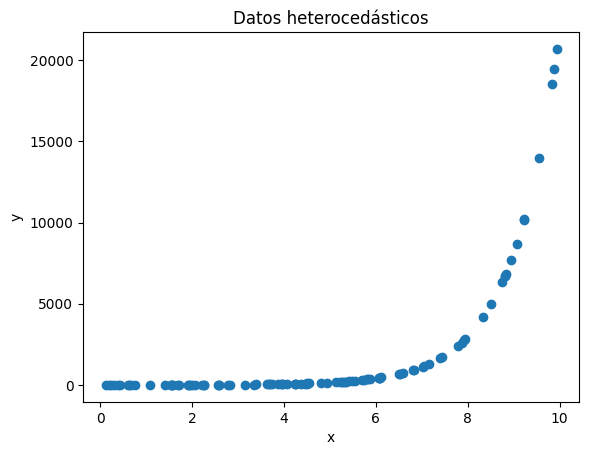

In [137]:
import numpy as np
import matplotlib.pyplot as plt
# Generar 100 datos aleatorios entre 0 y 10
x = np.random.uniform(0, 10, 100)
# Aplicar la función exponencial a x y añadir un ruido aleatorio
y = np.exp(x) + np.random.normal(0, x, 100)
# Graficar los datos
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Datos heterocedásticos")
plt.show()



*   Para generar datos que no cumplen con la independencia o la normalidad, se puede usar la función `np.random.choice` o `np.random.binomial` para crear una relación discreta o binaria entre las variables. Por ejemplo:



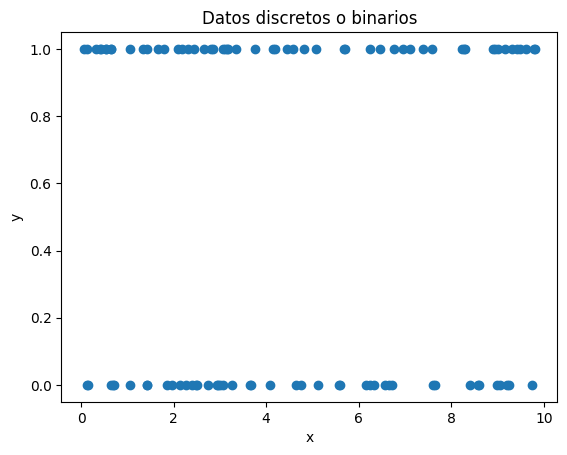

In [138]:
import numpy as np
import matplotlib.pyplot as plt
# Generar 100 datos aleatorios entre 0 y 10
x = np.random.uniform(0, 10, 100)
# Generar 100 datos binarios con una probabilidad de 0.5
y = np.random.choice([0, 1], 100, p=[0.5, 0.5])
# Graficar los datos
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Datos discretos o binarios")
plt.show()

# El Problema

Generar un algoritmo en python para regresión lineal con entrenamiento, para cada uno de los tres casos, pueden usar la librería scikit-learn,  que proporciona una clase llamada `LinearRegression` que permite estimar los coeficientes de la ecuación de regresión y obtener información relevante sobre la calidad del modelo.

**Nota**

Explicar en detalle que es lo que hace esta funcion y cada una de las funciones que va utilizar.

In [139]:
from sklearn.linear_model import LinearRegression

##  1.Datos que no cumplen con la linealidad


### Resources
- [Linear regression with sine/cosine elements](https://stats.stackexchange.com/questions/163837/linear-regression-with-sine-cosine-elements)

Para eliminar la nolinearidad del `y`. Vamos a realizar los siguientes cambio de variables.

$x_1 = sin(x)$


Y definir regresion lineal sobre `y` como:

$Y = \alpha + \beta x_1 + \epsilon$


NOTA: $x_1 in [0, 1]$, ya que $x_1 = sin(x)$, por lo que las predicciones de la regresion lineas, son solo validas en ese dominio.

In [140]:
x = np.random.uniform(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, 100)

x1 = np.sin(x)
#x2 = np.random.normal(0, 0.2, 100)

In [141]:
X = x1.reshape(-1, 1)
X.shape

(100, 1)

In [142]:
# Calcula los parametros de la regresion lineal para las caracteristicas X y etiquetas y
reg1 = LinearRegression().fit(X, y)

In [143]:
# coeficientes de la recta de la regresion lineal
reg1.coef_

array([1.02815915])

In [144]:
# coeficiente independiente de la recta de la regresion lineal
reg1.intercept_

-0.0012209757543317767

In [145]:
# prediccion usando la regresio lineal entrenada
y_pred = reg1.predict(X)

In [146]:
## metricas
# Resources:
# - https://scikit-learn.org/stable/modules/model_evaluation.html
# - https://machinelearningmastery.com/regression-metrics-for-machine-learning/

from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

print(f"r2_score: {r2_score(y, y_pred)}")
print(f"mean_absolute_error: {mean_absolute_error(y, y_pred)}")
print(f"mean_squared_error: {mean_squared_error(y, y_pred)}")

r2_score: 0.9225368505041721
mean_absolute_error: 0.16245072870046076
mean_squared_error: 0.04046233848783262


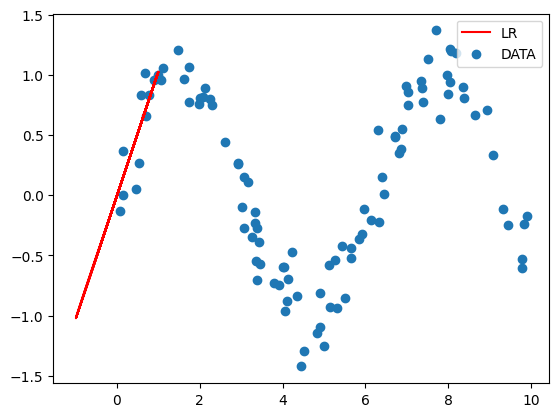

In [147]:
plt.plot(x1, y_pred, color='r', label="LR")
plt.scatter(x, y, label="DATA")
plt.legend()

## 2. Datos que no cumplen con la homocedasticidad

Tenemos

$y = e^x + Normal(0, x, 100)$

$log(y) = log(e^x + Normal(0, x, 100)) = log(e^x (1+ Normal(0, x, 100)/e^x))$
$log(y) = log(e^x) + log(1+ Normal(0, x, 100)/e^x)$
$log(y) = x + log(1+ Normal(0, x, 100)/e^x)$

Definiendo las variables

$x1 = x$

$x2 = log(1+ Normal(0, x, 100)/e^x)$


Y definiendo la regresion lineal, de la siguiente manera:

$Y= \alpha + \beta x_1 + \phi x_2 + \epsilon$

In [148]:
x = np.random.uniform(0, 10, 100)
y = np.exp(x) + np.random.normal(0, x, 100)

In [149]:
x1 = x
x2 = np.log(1+ np.random.normal(0, x, 100)/np.exp(x))

In [150]:
# los valores de x2 son relativamente pequeños comparados con x1
np.min(x2), np.max(x2)

(-1.0462056502797172, 0.4621843373505893)

In [151]:
X = np.hstack((x1.reshape(-1, 1), x2.reshape(-1, 1)))
#X = x1.reshape(-1, 1)
X.shape

(100, 2)

In [152]:
reg2 = LinearRegression().fit(X, y)

In [153]:
reg2.coef_

array([ 1313.58384573, -1708.78905117])

In [154]:
reg2.intercept_

-4104.005822059638

In [155]:
y_pred = reg2.predict(X)

In [156]:
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

print(f"r2_score: {r2_score(y, y_pred)}")
print(f"mean_absolute_error: {mean_absolute_error(y, y_pred)}")
print(f"mean_squared_error: {mean_squared_error(y, y_pred)}")

r2_score: 0.5071789392815369
mean_absolute_error: 2757.2520354410585
mean_squared_error: 13545864.743766183


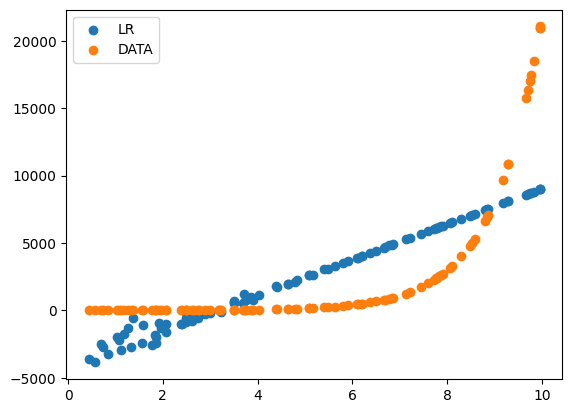

In [157]:
plt.scatter(x, y_pred, label="LR")
plt.scatter(x, y, label="DATA") # y or np.log(y) ?
plt.legend()

## 3. Datos que no cumplen con la independencia o la normalidad

In [158]:
x = np.random.uniform(0, 10, 100)
y = np.random.choice([0, 1], 100, p=[0.5, 0.5])

In [159]:
# la regresion deberia ser una recta constante por el valor que tenga mayor cantidad
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 47, 1: 53}

In [160]:
from keras.utils import to_categorical

# codificacion one-hot de variable y
#X = to_categorical(y, num_classes=2, dtype ="int32")
X = y.reshape(-1, 1)

X.shape

(100, 1)

In [161]:
reg3 = LinearRegression().fit(X, y)

In [162]:
reg3.coef_

array([1.])

In [163]:
reg3.intercept_

2.220446049250313e-16

In [164]:
y_pred = reg3.predict(X)

In [165]:
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

print(f"r2_score: {r2_score(y, y_pred)}")
print(f"mean_absolute_error: {mean_absolute_error(y, y_pred)}")
print(f"mean_squared_error: {mean_squared_error(y, y_pred)}")

r2_score: 1.0
mean_absolute_error: 1.63202784619898e-16
mean_squared_error: 2.970554346222873e-32


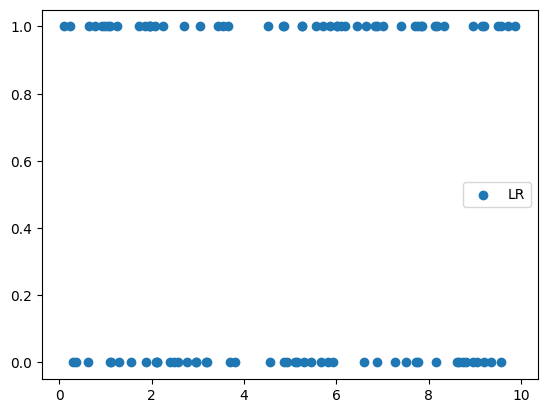

In [169]:
#plt.scatter(x, y, label="DATA")
plt.scatter(x, y_pred, label="LR")
plt.legend()